# 抓取IOTA

In [1]:
import requests
import pandas as pd

In [2]:
# CoinGecko(幣虎), https://www.coingecko.com/zh-tw
# YouTube: https://www.youtube.com/watch?v=wZ48Gjb-k2U
url = "https://www.coingecko.com/price_charts/692/usd/max.json"
url_headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36"}
data = requests.get(url, headers = url_headers)
data

<Response [200]>

In [3]:
# 資料為json格式
prices = data.json()['stats']
values = data.json()['total_volumes']
# 轉成dataframe
df = pd.DataFrame(prices)
dfV = pd.DataFrame(values)
# 合併
df['volume'] = dfV[1]  # 成交量
df.columns = ['datetime','price', 'volume']  # 給column name
df.head(5)

,datetime,price,volume
0,1497398400000,0.525974,1.423460e+07
1,1497484800000,0.356111,1.009138e+07
2,1497571200000,0.350355,1.002630e+07
3,1497657600000,0.446439,3.304578e+06
4,1497744000000,0.415184,2.571688e+06


In [4]:
# 將datetime欄位轉成日期格式, 資料取樣為天
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
# 轉成時間序列
df.index = df['datetime']
df.head()

,datetime,price,volume
datetime,,,
2017-06-14,2017-06-14,0.525974,1.423460e+07
2017-06-15,2017-06-15,0.356111,1.009138e+07
2017-06-16,2017-06-16,0.350355,1.002630e+07
2017-06-17,2017-06-17,0.446439,3.304578e+06
2017-06-18,2017-06-18,0.415184,2.571688e+06


Populating the interactive namespace from numpy and matplotlib


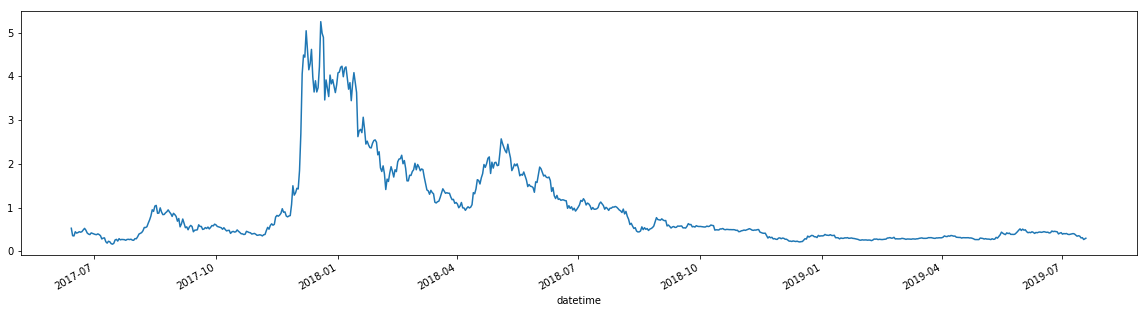

In [5]:
# 畫圖:價格
%pylab inline
df['price'].plot(kind = 'line', figsize=[20, 5])

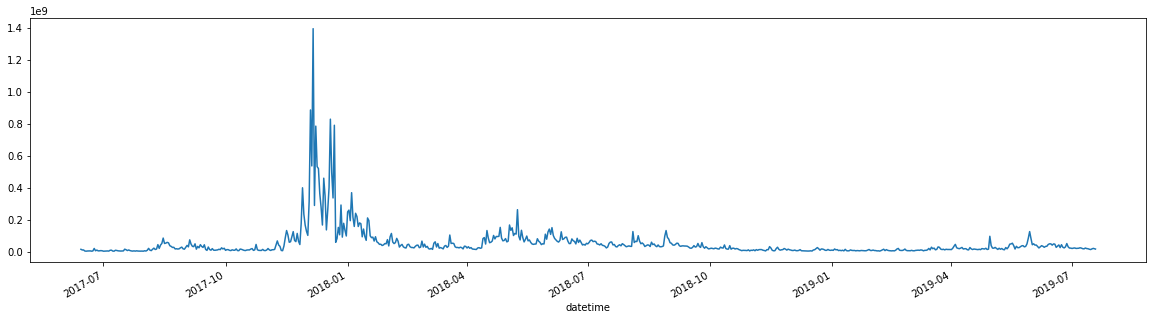

In [6]:
# 畫圖:成交量
df['volume'].plot(kind = 'line', figsize=[20, 5])

## MA技術指標

均線是移動平均線的簡稱，英文稱為(Moving Average, MA)，簡單的說就是過一段時間內的平均值。  
接下來增加一個5日均線及10日均線

In [7]:
df['ma5'] = df['price'].rolling(window = 5).mean()
df['ma10'] = df['price'].rolling(window = 10).mean()

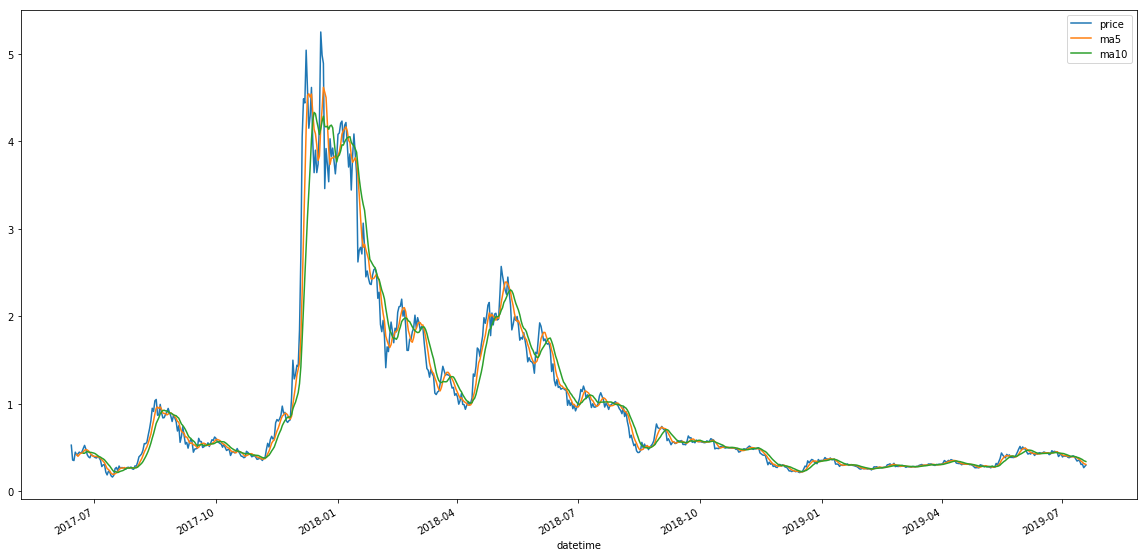

In [8]:
df[['price','ma5','ma10']].plot(kind = 'line', figsize=[20, 10])

# 布林通道

In [9]:
df['ma20'] = df['price'].rolling(window = 20).mean()
df['std20'] = df['price'].rolling(window = 20).std()
df['BB+'] = df['ma20'] + df['price'].rolling(window = 20).std()*2
df['BB-'] = df['ma20'] - df['price'].rolling(window = 20).std()*2

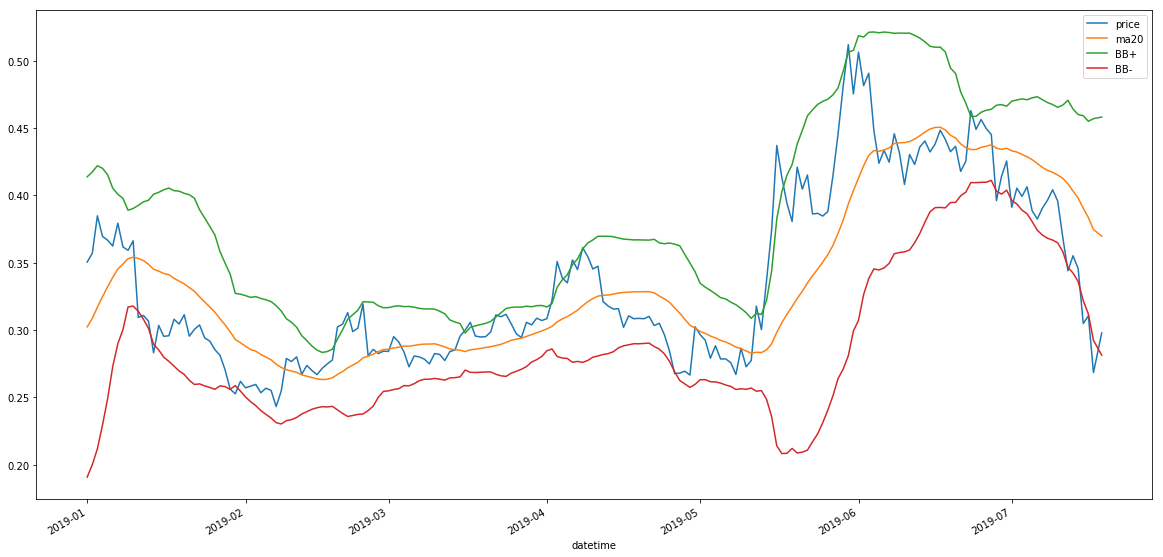

In [10]:
df4 = df[df['datetime'] >= '2019-01-01']
df4[['price','ma20','BB+', 'BB-']].plot(kind = 'line', figsize=[20, 10])